<a href="https://colab.research.google.com/github/mveiyo/Bharat-Intern/blob/main/Cats%26Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:11<00:00, 246MB/s]
100% 1.06G/1.06G [00:12<00:00, 94.9MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [6]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',  # Change this directory to your training data directory
    labels='inferred',
    label_mode='int',  # Fixed a typo in label_model to label_mode
    batch_size=32,
    image_size=(256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',  # Change this directory to your validation data directory
    labels='inferred',
    label_mode='int',  # Fixed a typo in label_model to label_mode
    batch_size=32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
#normalize
def process (image,label):
  image = tf.cast(image/255,tf.float32)
  return image,label

train_ds  = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Create a Sequential model
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Convolutional Layer 2
model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Convolutional Layer 3
model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Flatten layer
model.add(Flatten())

# Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train_ds,epochs=5,validation_data=validation_ds)

Epoch 1/5
625/625 [==============================] - 4229s 7s/step - loss: 1.3349 - accuracy: 0.5731 - val_loss: 0.6419 - val_accuracy: 0.6316
Epoch 2/5
625/625 [==============================] - 4178s 7s/step - loss: 0.6174 - accuracy: 0.6751 - val_loss: 0.5570 - val_accuracy: 0.7200
Epoch 3/5
625/625 [==============================] - 4109s 7s/step - loss: 0.5217 - accuracy: 0.7430 - val_loss: 0.5535 - val_accuracy: 0.7052
Epoch 4/5
625/625 [==============================] - 4099s 7s/step - loss: 0.4383 - accuracy: 0.7973 - val_loss: 0.4928 - val_accuracy: 0.7626
Epoch 5/5
625/625 [==============================] - 4066s 7s/step - loss: 0.3866 - accuracy: 0.8262 - val_loss: 0.5473 - val_accuracy: 0.7522


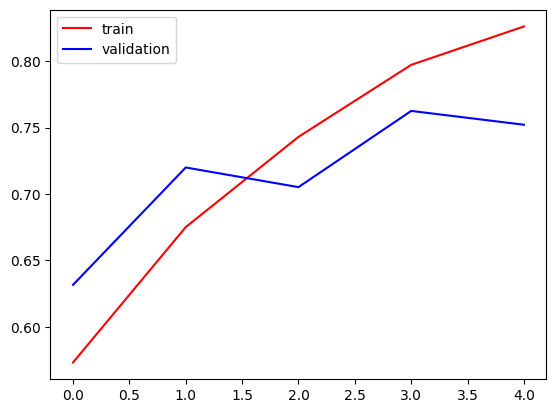

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

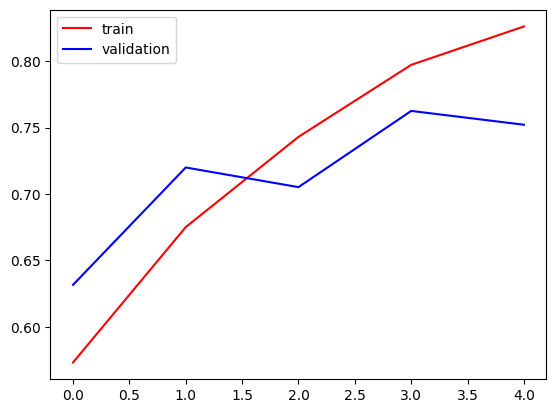

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

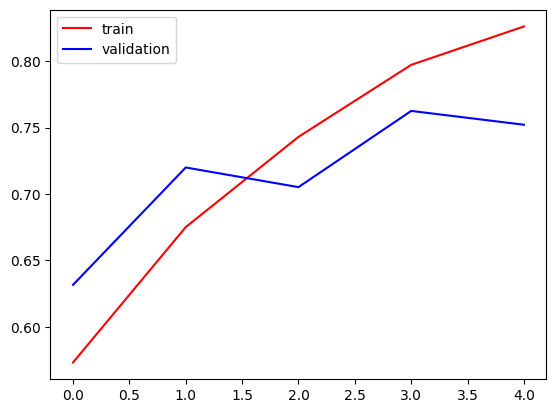

In [22]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

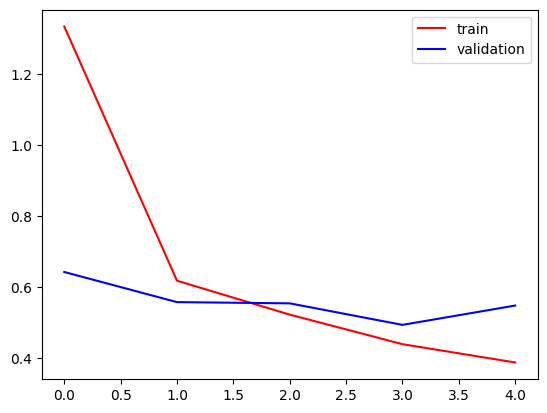

In [23]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

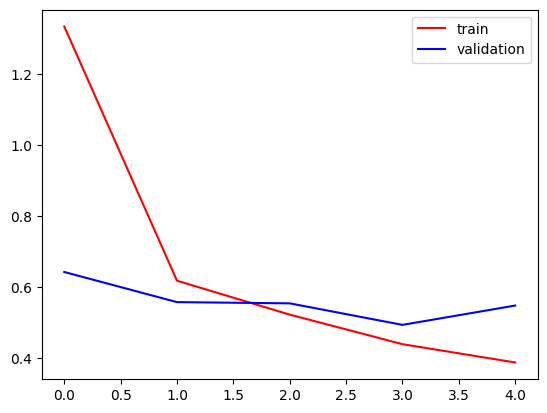

In [24]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [25]:
#need to reduce complexit
#add more dta
#reduce complexity

In [26]:
import cv2

In [27]:
test_image = cv2.imread('/content/cat.webp')

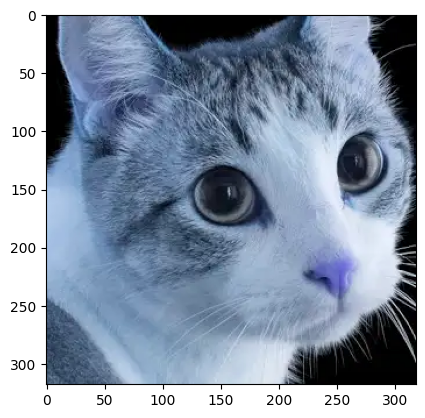

In [29]:
plt.imshow(test_image)

In [30]:
test_image.shape

(318, 318, 3)

In [31]:
test_image = cv2.resize(test_image,(256,256))

In [32]:
test_input = test_image.reshape(1,256,256,3)

In [33]:
model.predict(test_input)

1/1 [==============================] - 1s 553ms/step


array([[0.]], dtype=float32)